# Análise de dados do Covid-19

<br>

   Em dezembro de 2019 uma doença começou a causar um grande número de infectados, na China. Tratava-se de um vírus que atinge o sistema respiratório e, por ser altamente contagioso, rapidamente se espalhou para outros países.
    
   Nomeada de Covid-19, a doença causada pelo coronavírus causou uma pandemia global, originando mais de 20 milhões de infectados e quase 1 milhão de mortes ao redor do planeta. O vírus fez com que o mundo entrasse não somente em uma crise no setor da saúde, mas também no financeiro e social.
   
   Nesse projeto, trabalharemos com um dataset contendo dados de casos confirmados, mortes e recuperados do Covid-19, a partir de Janeiro de 2020. Passando pelas etapas de leitura, limpeza, análise e visualização dos dados.
  
<i>
    
   A base de dados foi extraída do John Hopkins University Center for Systems Science and Engineering.
</i>

Importando bibliotecas:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Links para os datasets:

<b>github</b>

<a>https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv</a>

<b>Arquivos csv:</b>

<i>Casos confirmados</i>

<a>https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv</a>

<i>Mortes</i>

<a>https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv</a>

<i>Curados</i>

<a>https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

## Casos confirmados

Lendo o dataset de casos confirmados:

In [38]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,955,955,955,963,963,977,981,989,989,989
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906


Tamanho do dataframe (linhas X colunas):

In [39]:
confirmed.shape

(266, 212)

Países presentes no dataframe:

In [40]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

Quantidade de países:

In [41]:
confirmed['Country/Region'].unique().size

188

Buscando uma amostra de 20 registros aleatórios, observa-se que alguns não estão preenchidos (NaN), na coluna Province/State 

In [42]:
confirmed.sample(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
229,NaN,Suriname,3.919300,-56.027800,0,0,0,0,0,0,...,2203,2306,2391,2489,2559,2653,2761,2838,2961,3016
154,NaN,Kenya,-0.023600,37.906200,0,0,0,0,0,0,...,25138,25837,26436,26928,27425,28104,28754,29334,29849,30120
182,NaN,Morocco,31.791700,-7.092600,0,0,0,0,0,0,...,30662,32007,33237,34063,35195,36694,37935,39241,41017,42489
91,NaN,Congo (Brazzaville),-0.228000,15.827700,0,0,0,0,0,0,...,3637,3664,3664,3664,3745,3745,3745,3745,3745,3831
163,NaN,Liberia,6.428055,-9.429499,0,0,0,0,0,0,...,1230,1234,1237,1240,1250,1252,1252,1252,1257,1257
189,Sint Maarten,Netherlands,18.042500,-63.054800,0,0,0,0,0,0,...,176,177,189,189,205,248,263,269,300,317
107,NaN,Egypt,26.820553,30.802498,0,0,0,0,0,0,...,95147,95314,95492,95666,95834,95963,96108,96220,96336,96475
65,Hebei,China,39.549000,116.130600,1,1,2,8,13,18,...,349,349,349,350,350,351,351,351,351,351
44,New Brunswick,Canada,46.565300,-66.461900,0,0,0,0,0,0,...,176,176,176,176,177,178,180,180,184,186
195,NaN,North Macedonia,41.608600,21.745300,0,0,0,0,0,0,...,11554,11754,11839,11942,12083,12217,12357,12515,12653,12739


Crio uma variável que agrupa o dataframe pela coluna Country/Region

In [43]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()

In [44]:
confirmed.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,955,955,955,963,963,977,981,989,989,989
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,92,92,92,92,92,92,92,93,93,93
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,235677,241811,246499,253868,260911,268574,276072,282437,289100,294569
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,39985,40185,40410,40433,40593,40794,41023,41299,41495,41663
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,3851,3861,3875,3897,3915,3927,3936,3945,3950,3957


In [45]:
confirmed_by_country.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,955,955,955,963,963,977,981,989,989,989
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906
Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,...,92,92,92,92,92,92,92,93,93,93
Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,...,235677,241811,246499,253868,260911,268574,276072,282437,289100,294569
Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,...,39985,40185,40410,40433,40593,40794,41023,41299,41495,41663
Australia,-256.85020,1130.843900,0,0,0,0,4,5,5,6,...,20698,21084,21397,21713,22127,22358,22742,23035,23287,23558


É possível retornar resultados de um país específico utilizando a função loc, que retorna o resultado passando o índice;

Como as duas primeiras colunas Lat e Long são referentes à latitude e longitude, não é interessante que sejam trazidas, por isso especifico que quero os resultados a partir da segunda coluna (referentes ao número de casos confirmados por dia);

Exemplifico utilizando a China e o Brasil. A primeira coluna é o dia e a segunda são os casos confirmados naquela data.

In [46]:
confirmed_in_china = confirmed_by_country.loc['China'][2:]
confirmed_in_china

1/22/20      548.0
1/23/20      643.0
1/24/20      920.0
1/25/20     1406.0
1/26/20     2075.0
            ...   
8/12/20    89045.0
8/13/20    89144.0
8/14/20    89214.0
8/15/20    89279.0
8/16/20    89375.0
Name: China, Length: 208, dtype: float64

In [47]:
confirmed_in_brasil = confirmed_by_country.loc['Brazil'][2:]
confirmed_in_brasil

1/22/20          0.0
1/23/20          0.0
1/24/20          0.0
1/25/20          0.0
1/26/20          0.0
             ...    
8/12/20    3164785.0
8/13/20    3224876.0
8/14/20    3226443.0
8/15/20    3317096.0
8/16/20    3340197.0
Name: Brazil, Length: 208, dtype: float64

Observa-se que no último dia que o dataset nos trás, a <b>China</b> tinha cerca de <b>89 mil casos</b> confirmados de Covid-19, enquanto o <b>Brasil</b> tinha cerca de <b>3.1 milhões.</b>

Agora exibo um simples gráfico que mostra a evolução do vírus nesses dois países:

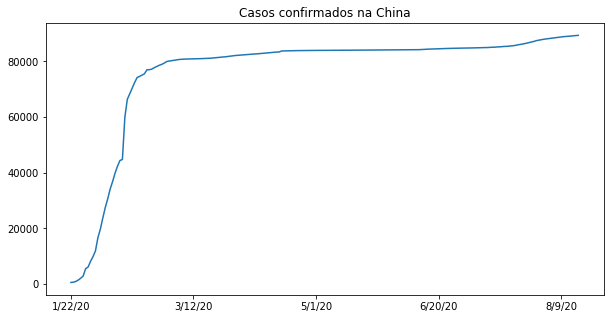

In [48]:
plt.figure(figsize=(10,5))  #Dimensões do gráfico

confirmed_in_china.plot()

plt.title('Casos confirmados na China')  #Título
plt.show()

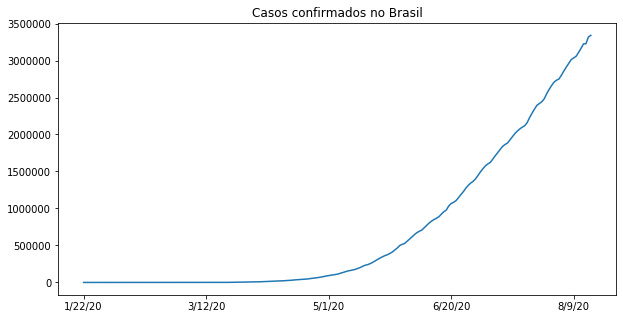

In [49]:
plt.figure(figsize=(10,5))

confirmed_in_brasil.plot()

plt.title('Casos confirmados no Brasil')  
plt.show()

Agora é feita a diferença dos registros (número de casos), onde todos eles são percorridos e é feito o cálculo do próximo registro - anterior. Isso mostra o aumento de casos de um dia para o outro.

Cada linha representa essa diferença, que foi feita através da função diff.

Observa-se que a primeira linha é NaN, pois não possui registro de um dia anterior a esse, então não pode ser feita a diferença entre o dia 22/01/2020 - ?

In [50]:
confirmed_in_china.diff()

1/22/20      NaN
1/23/20     95.0
1/24/20    277.0
1/25/20    486.0
1/26/20    669.0
           ...  
8/12/20     87.0
8/13/20     99.0
8/14/20     70.0
8/15/20     65.0
8/16/20     96.0
Name: China, Length: 208, dtype: float64

In [51]:
new_cases_in_china = confirmed_in_china.diff().dropna()
new_cases_in_china

1/23/20     95.0
1/24/20    277.0
1/25/20    486.0
1/26/20    669.0
1/27/20    802.0
           ...  
8/12/20     87.0
8/13/20     99.0
8/14/20     70.0
8/15/20     65.0
8/16/20     96.0
Name: China, Length: 207, dtype: float64

In [52]:
new_cases_in_brasil = confirmed_in_brasil.diff().dropna()
new_cases_in_brasil

1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
1/27/20        0.0
            ...   
8/12/20    55155.0
8/13/20    60091.0
8/14/20     1567.0
8/15/20    90653.0
8/16/20    23101.0
Name: Brazil, Length: 207, dtype: float64

Agora exibo o gráfico correspondente ao aumento do número de casos por dia:

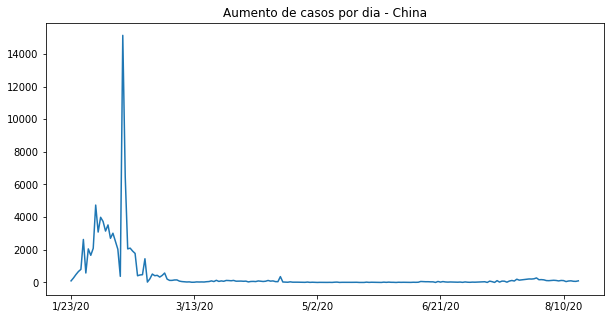

In [53]:
plt.figure(figsize=(10,5))  

new_cases_in_china.plot()

plt.title('Aumento de casos por dia - China')  
plt.show()

Capturo todas as linhas da última coluna (última data):

In [54]:
last_date = confirmed_by_country.iloc[:,-1]
last_date

Country/Region
Afghanistan           37596
Albania                7380
Algeria               38583
Andorra                 989
Angola                 1906
                      ...  
West Bank and Gaza    16534
Western Sahara           10
Yemen                  1869
Zambia                 9343
Zimbabwe               5261
Name: 8/16/20, Length: 188, dtype: int64

Obtendo os casos confirmados na última data, ordeno os registros de forma decrescente e retorno os 10 países com maior número de casos, em um gráfico de barras vertical.

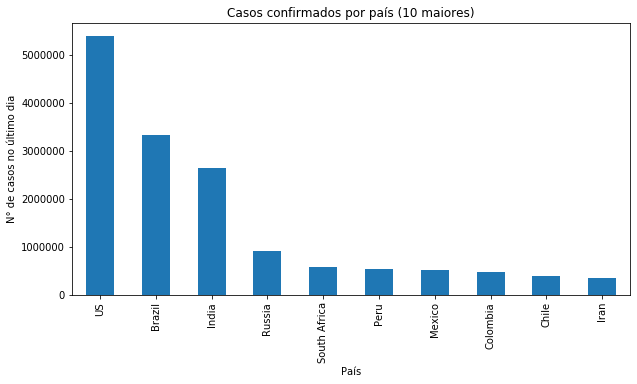

In [55]:
plt.figure(figsize=(10,5))  

last_date.sort_values(ascending=False)[0:10].plot(kind='bar')

plt.title('Casos confirmados por país (10 maiores)')
plt.ylabel('N° de casos no último dia')
plt.xlabel('País')
plt.show()

## Número de mortes

In [56]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,189,193,199,200,205,208,213,219,225,228
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1282,1293,1302,1312,1322,1333,1341,1351,1360,1370
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,67,70,75,78,80,80,80,86,86,88


## Recuperados

In [57]:
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,23667,24083,24506,24920,25263,25627,26004,26308,26644,27017
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,839,839,839,839,839,855,858,863,863,863
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,544,564,567,569,575,577,577,584,628,628


## Agrupando números atualizados

Crio uma função que agrupa o dataframe pela coluna Country/Region e retorna os registros da última coluna (-1)

In [58]:
def latest_by_country(data):
    return data.groupby('Country/Region').sum().iloc[:,-1]

Agora chamo a função três vezes, passando os dataframes de casos confirmados, mortes e recuperados, armazendo os resultados dentro de um array:

In [59]:
updated_informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
updated_informations

[Country/Region
 Afghanistan           37596
 Albania                7380
 Algeria               38583
 Andorra                 989
 Angola                 1906
                       ...  
 West Bank and Gaza    16534
 Western Sahara           10
 Yemen                  1869
 Zambia                 9343
 Zimbabwe               5261
 Name: 8/16/20, Length: 188, dtype: int64,
 Country/Region
 Afghanistan           1375
 Albania                228
 Algeria               1370
 Andorra                 53
 Angola                  88
                       ... 
 West Bank and Gaza     110
 Western Sahara           1
 Yemen                  530
 Zambia                 260
 Zimbabwe               132
 Name: 8/16/20, Length: 188, dtype: int64,
 Country/Region
 Afghanistan           27166
 Albania                3794
 Algeria               27017
 Andorra                 863
 Angola                  628
                       ...  
 West Bank and Gaza     9838
 Western Sahara            8
 Yemen 

Observa-se que as informações vieram agrupadas em uma única Series. Porém, a intenção é gerar um novo dataframe com uma coluna para o número de <b>casos confirmados</b>, outra coluna para o número de <b>mortes</b> e outra para o número de <b>recuperados</b>, todos esses números atualizados <b>no último dia</b>. 

Para isso, crio uma nova variável com a combinação desses dados, concatenando e dividindo por colunas.

In [60]:
combined = pd.concat(updated_informations, axis=1)
combined.columns = ['confirmed', 'deaths', 'recovered']

combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,37596,1375,27166
Albania,7380,228,3794
Algeria,38583,1370,27017
Andorra,989,53,863
Angola,1906,88,628


### Taxa de Letalidade

Agora faço o cálculo da <b>taxa de letalidade</b> do vírus, dividindo o número de mortos pelo número de casos confirmados, depois multiplico por 100 para transformar em percentual.

Explicação sobre a taxa de letalidade:

<a>https://pt.wikipedia.org/wiki/Taxa_de_letalidade</a>

In [61]:
letality_rate = (combined.deaths / combined.confirmed) * 100
letality_rate = letality_rate.round(2)  # 2 casas decimais
letality_rate.head()

Country/Region
Afghanistan    3.66
Albania        3.09
Algeria        3.55
Andorra        5.36
Angola         4.62
dtype: float64

Crio uma nova coluna para a taxa de letalidade

In [62]:
 combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,37596,1375,27166
Albania,7380,228,3794
Algeria,38583,1370,27017
Andorra,989,53,863
Angola,1906,88,628


In [63]:
combined['letality_rate'] = letality_rate
combined.head()

,confirmed,deaths,recovered,letality_rate
Country/Region,,,,
Afghanistan,37596,1375,27166,3.66
Albania,7380,228,3794,3.09
Algeria,38583,1370,27017,3.55
Andorra,989,53,863,5.36
Angola,1906,88,628,4.62


É possível visualizar os países com as maiores taxas de letalidade (no último dia):

<i>Observa-se que países com pouquíssimos casos confirmados, possuem taxa de letalidade alta. Isso não quer dizer que o país teve um grande número de mortes, apenas que a proporção de mortes/casos é alta.</i>

In [64]:
combined.sort_values('letality_rate', ascending = False).head(10)

,confirmed,deaths,recovered,letality_rate
Country/Region,,,,
Yemen,1869,530,1013,28.36
MS Zaandam,9,2,0,22.22
United Kingdom,320343,46791,1486,14.61
Italy,253915,35396,203786,13.94
Belgium,78323,9939,17994,12.69
Hungary,4916,608,3623,12.37
France,252965,30410,83993,12.02
Mexico,522162,56757,424298,10.87
Western Sahara,10,1,8,10.00


Gráfico de distribuição

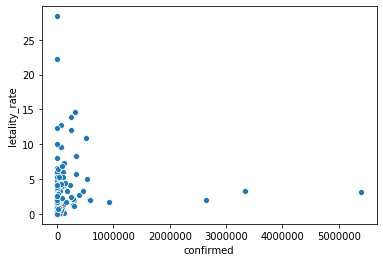

In [65]:
sns.scatterplot(data = combined, x = 'confirmed', y = 'letality_rate')

Observa-se que existe uma grande quantidade de países com menos de 100 mil casos confirmados, porém existem países que estão na casa dos milhões. Isso faz com que o gráfico seja difícil de ser analisado.

Posso gerar 2 gráficos, o primeiro contendo os países com número de casos menor que 100 mil e o segundo com mais de 100 mil.

[Text(0, 0.5, 'Taxa de letalidade %'), Text(0.5, 0, 'Casos confirmados')]

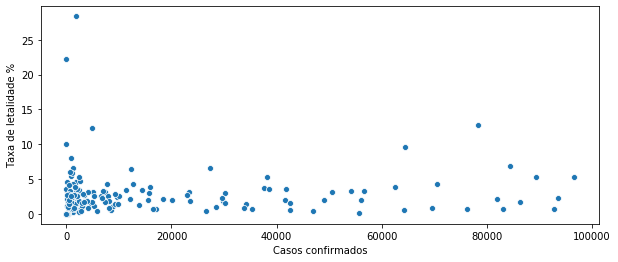

In [66]:
plt.figure(figsize=(10,4))

less_100k = sns.scatterplot(data = combined.query('confirmed < 100000'), x = 'confirmed', y = 'letality_rate')
less_100k = less_100k.set(xlabel='Casos confirmados', ylabel='Taxa de letalidade %')
less_100k

[Text(0, 0.5, 'Taxa de letalidade %'), Text(0.5, 0, 'Casos confirmados')]

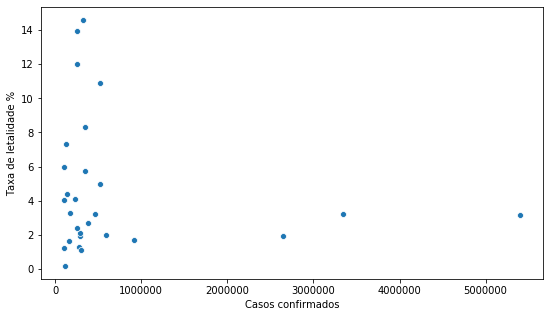

In [67]:
plt.figure(figsize=(9,5))

over_100k = sns.scatterplot(data = combined.query('confirmed >= 100000'), x = 'confirmed', y = 'letality_rate')
over_100k = over_100k.set(xlabel='Casos confirmados', ylabel='Taxa de letalidade %')
over_100k

Também posso criar uma função que retorna os registros de uma data específica:

In [68]:
def latest_by_country_at(data, date):
    return data.groupby('Country/Region').sum()[date]

Agora utilizo a função passando o dia 10/08/2020:

<i>Obs: as datas do dataset estão no formato M/DD/YY</i>

Novamente instancio a função latest_by_country, 3 vezes, para cada uma das três colunas. Depois concateno esses resultados em uma nova variável

In [69]:
informations = [latest_by_country_at(confirmed, '8/10/20'), latest_by_country_at(deaths, '8/10/20'), latest_by_country_at(recovered, '8/10/20')]
combined_8_10_20 = pd.concat(informations, axis=1)
combined_8_10_20.head()

,8/10/20,8/10/20,8/10/20
Country/Region,,,
Afghanistan,37162,1328,26228
Albania,6536,200,3379
Algeria,35712,1312,24920
Andorra,963,52,839
Angola,1679,78,569


Renomeando as colunas:

In [70]:
combined_8_10_20.columns = ['confirmed', 'deaths', 'recovered']
combined_8_10_20.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,37162,1328,26228
Albania,6536,200,3379
Algeria,35712,1312,24920
Andorra,963,52,839
Angola,1679,78,569


Agora calculo a taxa de letalidade para essa data específica

In [76]:
sum_up = combined_8_10_20.sum()   #Soma dos dados de cada coluna
letality_rate = (sum_up['deaths'] / sum_up['confirmed']) * 100   #Taxa de letalidade em percentual
letality_rate.round(2)   #Arredondamento para duas casas decimais

3.66

A taxa de letalidade também pode ser calculada para um país específico:

In [77]:
sum_up = combined_8_10_20.loc['Brazil']   #Especificando uma linha, Brazil
letality_rate = (sum_up['deaths'] / sum_up['confirmed']) * 100   
letality_rate.round(2)   

3.33

De acordo com o site worldometer, o cálculo da taxa de letalidade usando a fórmula <b>mortes / casos</b> pode ser <b>enganoso</b> enquanto uma pandemia ainda está em curso.

No caso do coronavirus, como até o momento em que esse projeto foi realizado a pandemia ainda está em curso, a <b>fórmula</b> a ser utilizada deve ser um pouco <b>diferente</b>.

<i>"as mortes atuais pertencem a um número total de casos do passado, não ao número de casos atuais em que o desfecho (recuperação ou morte) de uma proporção (os casos mais recentes) ainda não foi determinado.

A fórmula correta, portanto, parece ser: 
</i>


<b>mortes no dia x / casos no dia x - T</b>

<i>T = período médio de tempo desde a confirmação do caso até a morte" (podendo ser de 12 a 13 dias)</i>

Link da publicação:
<a>https://www.worldometers.info/coronavirus/coronavirus-death-rate/</a>
<br>

No nosso exemplo, como usei o dia <b>10/08/2020</b>, o número de casos confirmados deve ser definido em <b>12 dias antes</b> do dia 10/08, ou seja, dia <b>30/07</b>:

In [82]:
informations = [latest_by_country_at(confirmed, '7/30/20'), latest_by_country_at(deaths, '8/10/20'), latest_by_country_at(recovered, '8/10/20')]
combined_12 = pd.concat(informations, axis=1)

combined_12.columns = ['confirmed', 'deaths', 'recovered']

sum_up = combined_12.loc['Brazil']   
letality_rate_2 = (sum_up['deaths'] / sum_up['confirmed']) * 100   

letality_rate_2.round(2)

3.9

<i>Observa-se que, com a nova fórmula, houve uma mudança na taxa de letalidade em relação à fórmula antiga. Esse novo percentual é mais confiável.<i/>